# Plots hourly processed data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

label = ['South West', 'South East', 'Greater London']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']
wind_solar_column_energy = ['SouthWest.Wind+Solar (MWh)','SouthEast.Wind+Solar (MWh)','GreaterLondon.Wind+Solar (MWh)']

df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
    df_proc[wind_solar_column_energy[i]] = df_proc_sheet['Wind MWh']+df_proc_sheet['Solar MWh']
df_proc = df_proc.set_index('date')
df_proc['time'] = np.arange(0,8760)

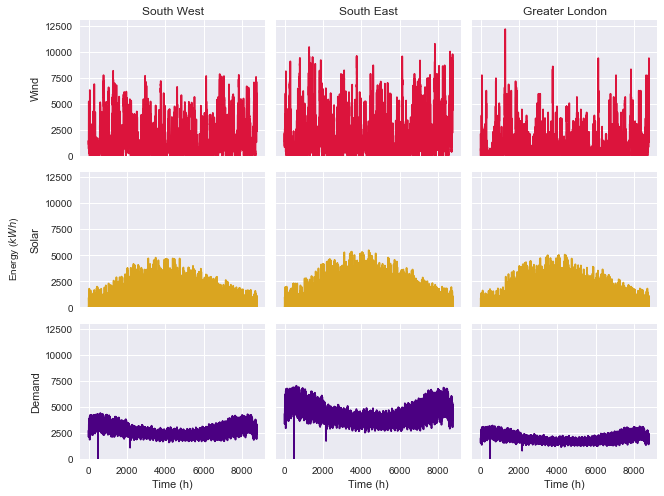

In [17]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(3,3,figsize=(9,7), sharex=True, sharey=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df_proc['time']
    y = df_proc[wind_column_energy[i]]
    axx.set_ylim(0,13000)
    axx.plot(x,y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,13000)
    x = df_proc['time']
    y = df_proc[solar_column_energy[i]]
    axx.plot(x,y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    x = df_proc['time']
    y = df_proc[demand_column_energy[i]]
    axx.plot(x,y,label=label[i],color=deficit_color)
    axx.set_ylim(0,13000)
    if i == 0:
        axx.set_ylabel("Demand")
    axx.set_xlabel('Time (h)')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
plt.tight_layout()
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.savefig("processed_data_hourly_wind_speed_solar_demand_energy.png")

# Daily average of processed data

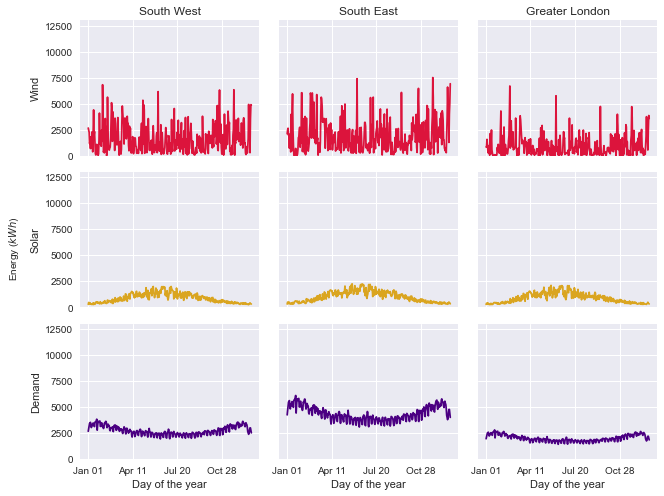

In [18]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(3,3,figsize=(9,7), sharex=True, sharey=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    y = df_proc[wind_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.set_ylim(0,13000)
    axx.plot(y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,13000)
    y = df_proc[solar_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    y = df_proc[demand_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=deficit_color)
    axx.set_ylim(0,13000)
    if i == 0:
        axx.set_ylabel("Demand")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
    axx.set_xlabel('Day of the year')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("processed_data_daily_wind_speed_solar_demand_energy.png")

# Monthly distributions of processed data

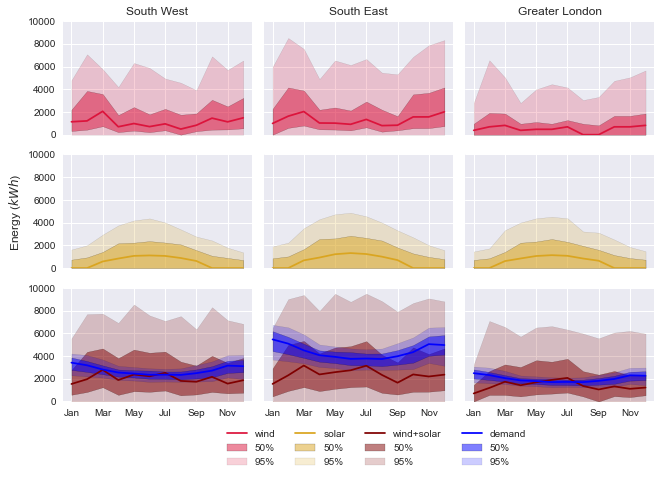

In [7]:

#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(9,6),sharex=True,sharey=True)

for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j),'imax':2}
    params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j),'imax':2}
    params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j),'imax':2}
    params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j),'imax':2}
    wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    ws1,ws2,ws3 = plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)
    dem1,dem2,dem3 = plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)



for i,j in [(i,j) for i in [0,1,2] for j in [0,1,2]]:
    ax[i][j].set_xticks(range(1,13,2))
    ax[i][j].set_xticklabels([datetime.strptime(str(month), "%m").strftime('%b') for month in range(1,13,2)])

fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3,ws1,ws2,ws3,dem1,dem2,dem3],
                bbox_to_anchor=(.8,-0.11), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)
    
fig.text(-0.015, 0.5, energy_label, size='large',  va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("monthly_distribution_wind_solar_demand.png", bbox_inches='tight')

# Hourly distributions of processed data

## Hourly distributions of mean Wind, Solar, Wind+Solar, Demand (4 seasons)

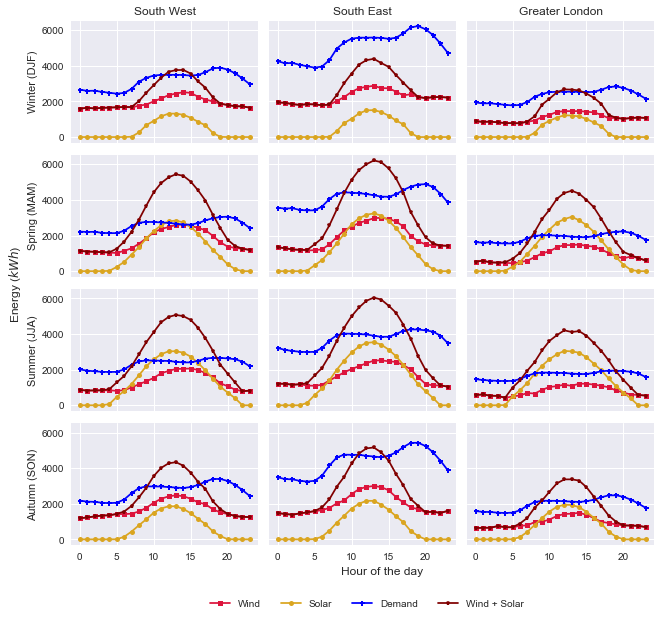

In [4]:
mpl.style.use('seaborn')
#create figure, and axes

#winter is DJF
winter = {'label':'Winter (DJF)', 'plot_pos':0,
          'period':((df_proc.index >= datetime(2020, 12, 1)) | (df_proc.index < datetime(2020, 3, 1)) )}
spring = {'label':'Spring (MAM)', 'plot_pos':1,
          'period':((df_proc.index >= datetime(2020, 3, 1)) & (df_proc.index < datetime(2020, 6, 1)))}
summer = {'label':'Summer (JJA)', 'plot_pos':2,
          'period':((df_proc.index >= datetime(2020, 6, 1)) & (df_proc.index < datetime(2020, 9, 1)) )}
autumn = {'label':'Autumn (SON)', 'plot_pos':3,
          'period':((df_proc.index >= datetime(2020, 9, 1)) & (df_proc.index < datetime(2020, 12, 1)))}

fig,ax =  plt.subplots(4,3,figsize=(9,8), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    df_season_hourly =  df_season.groupby(df_season.index.hour).mean()
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'s-',markersize=5,label=wind_energy_label,color=wind_color)
        if i == 0:
            ax[j][i].set_ylabel(season['label'])
    for i in [0,1,2]:
        y=df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'o-',markersize=5,label=solar_energy_label,color=solar_color)
    for i in [0,1,2]:
        y=df_season_hourly[demand_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'P-',markersize=5,label=demand_label,color=demand_color)
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]+df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'p-',markersize=5,label=wind_solar_energy_label,color=wind_solar_color)
        if j==0:
            ax[j][i].title.set_text(label[i])
handles, labels = ax[j][2].get_legend_handles_labels()
fig.text(-0.015, 0.5, energy_label, fontsize='large', va='center', rotation='vertical')
fig.text(0.5, 0, "Hour of the day", fontsize='large', va='center')

fig.legend(handles, labels, bbox_to_anchor=(.54,-0.08),loc='lower center', ncol=4)
plt.tight_layout()
plt.savefig("hourly_distribution_wind_solar_demand_NO_SHADE_SEASON.png")

## Hourly distributions (all year Median + quantiles)

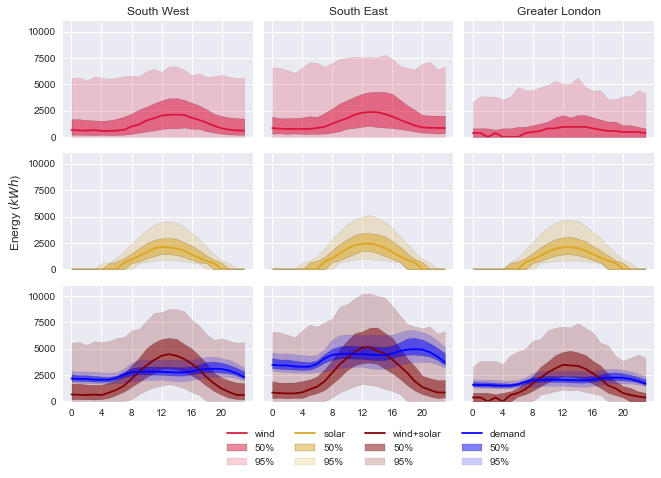

In [6]:
def plot_median_quantiles(y,x,ax,params):
    color, ylim, ylabel, xlabel,legend, (i,j), imax = params['color'], params['ylim'],params['ylabel'],params['xlabel'],params['legend'], params['pos'], params['imax']
    bounds_75 = y.groupby(x).quantile(0.75)
    bounds_25 = y.groupby(x).quantile(0.25)
    bounds_975 = y.groupby(x).quantile(0.975)
    bounds_025 = y.groupby(x).quantile(0.025)
    y_median = y.groupby(x).median()
    line1, = ax.plot(y_median,color=color,label=legend)
    line2 = ax.fill_between(x=bounds_25.index,y1=bounds_25,y2=bounds_75,alpha=0.5,color=color,edgecolor = "black",label="50%")
    line3 = ax.fill_between(x=bounds_025.index,y1=bounds_025,y2=bounds_975,alpha=0.2,color=color, edgecolor = "black",label="95%")
    ax.set_ylim(ylim)
    if i==0:
        ax.title.set_text(label[j])
    #plt.legend(title='Smoker', loc='upper right', labels=['Hell Yeh', 'Nah Bruh'])
    return line1, line2, line3

    
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(9,6),sharex=True,sharey=True)
for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'xlim':[0,4,8,12,16,20,24],'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Hour",'legend':"wind",'pos':(0,j),'imax':2}
    params_solar = {'color':solar_color,'xlim':(0,7500),'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Hour",'legend':"solar",'pos':(1,j),'imax':2}
    params_demand = {'color':demand_color,'xlim':(0,7500),'ylim':(0,11000),'ylabel':energy_label,'xlabel':"Hour",'legend':"demand",'pos':(2,j),'imax':2}
    params_wind_solar = {'color':wind_solar_color,'xlim':(0,7500),'ylim':(0,11000),'ylabel':energy_label,'xlabel':"Hour",'legend':"wind+solar",'pos':(2,j),'imax':2}    
    wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][j],params_wind)
    sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][j],params_solar)
    ws1,ws2,ws3 = plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[2][j],params_wind_solar)
    dem1,dem2,dem3 = plot_median_quantiles(y_demand,y_demand.index.hour,ax[2][j],params_demand)
    
for i,j in [(i,j) for i in [0,1,2] for j in [0,1,2]]:
    ax[i][j].set_xticks([0,4,8,12,16,20])

fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3,ws1,ws2,ws3,dem1,dem2,dem3],
                bbox_to_anchor=(.8,-0.11), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)
fig.text(-0.015, 0.5, energy_label, size='large',  va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("hourly_distribution_wind_solar_demand.png", bbox_inches='tight')

## Hourly distributions DEMAND vs Wind+Solar (Seasonal Median + quantiles)

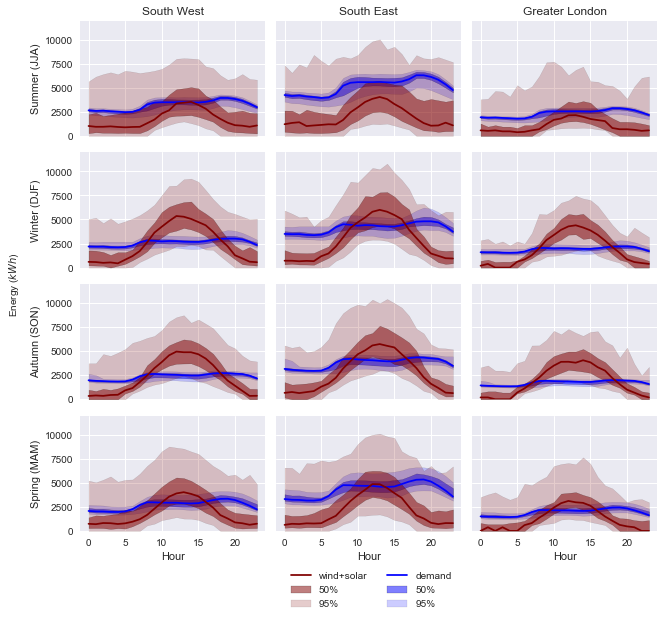

In [8]:
fig,ax =  plt.subplots(4,3,figsize=(9,8), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column_energy[j]]
        y_solar = df_season[solar_column_energy[j]]
        y_demand = df_season[demand_column_energy[j]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color, 'ylim':(0,7500),
                       'xlabel':"Hour", 'ylabel':season['label'],
                       'legend':"wind",'pos':(i,j),'imax':3}
        params_solar = {'color':solar_color, 'ylim':(0,7500),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"solar", 'pos':(i,j),'imax':3}
        params_demand = {'color':demand_color,'ylim':(0,12000),
                         'xlabel':"Hour",'ylabel':season['label'],
                         'legend':"demand",'pos':(i,j),'imax':3}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,12000),
                             'xlabel':"Hour",'ylabel':season['label'],
                             'legend':"wind+solar",'pos':(i,j),'imax':3}
        dem1,dem2,dem3 =plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        ws1,ws2,ws3 =plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)

fig.legend(handles=[ws1,ws2,ws3,dem1,dem2,dem3],
                bbox_to_anchor=(.68,-0.08), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)

for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3:
        ax[i][j].set_xlabel('Hour')
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png", bbox_inches='tight')


## Plot hourly distributions Wind vs Solar (Seasonal Median + quantiles)

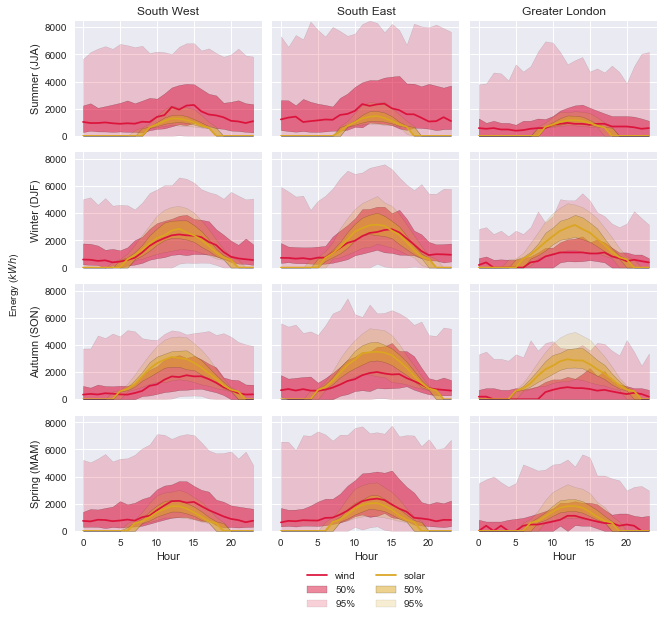

In [9]:
fig,ax =  plt.subplots(4,3,figsize=(9,8), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column_energy[j]]
        y_solar = df_season[solar_column_energy[j]]
        y_demand = df_season[demand_column_energy[j]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color, 'ylim':(0,8500),
                       'xlabel':"Hour", 'ylabel':season['label'],
                       'legend':"wind",'pos':(i,j),'imax':3}
        params_solar = {'color':solar_color, 'ylim':(0,8500),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"solar", 'pos':(i,j),'imax':3}
        params_demand = {'color':demand_color,'ylim':(0,10000),
                         'xlabel':"Hour",'ylabel':season['label'],
                         'legend':"demand",'pos':(i,j),'imax':3}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),
                             'xlabel':"Hour",'ylabel':season['label'],
                             'legend':"wind+solar",'pos':(i,j),'imax':3}
        wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.hour, ax[i][j],params_wind)
        sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.hour,ax[i][j],params_solar)
        # plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        # plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3:
        ax[i][j].set_xlabel('Hour')
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3],
                bbox_to_anchor=(.64,-0.08), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png", bbox_inches='tight')
#fig.legend(handles, labels, loc='upper right')

# Day of the week plots

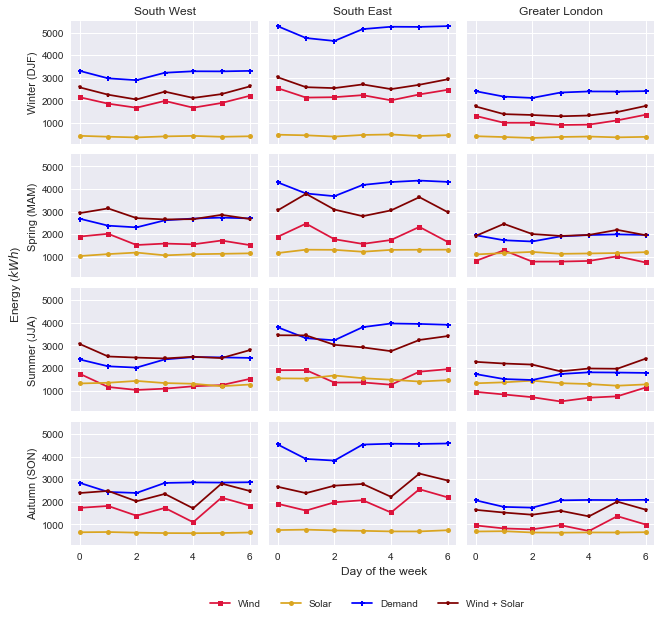

In [15]:
mpl.style.use('seaborn')
#create figure, and axes

#winter is DJF
winter = {'label':'Winter (DJF)', 'plot_pos':0,
          'period':((df_proc.index >= datetime(2020, 12, 1)) | (df_proc.index < datetime(2020, 3, 1)) )}
spring = {'label':'Spring (MAM)', 'plot_pos':1,
          'period':((df_proc.index >= datetime(2020, 3, 1)) & (df_proc.index < datetime(2020, 6, 1)))}
summer = {'label':'Summer (JJA)', 'plot_pos':2,
          'period':((df_proc.index >= datetime(2020, 6, 1)) & (df_proc.index < datetime(2020, 9, 1)) )}
autumn = {'label':'Autumn (SON)', 'plot_pos':3,
          'period':((df_proc.index >= datetime(2020, 9, 1)) & (df_proc.index < datetime(2020, 12, 1)))}

fig,ax =  plt.subplots(4,3,figsize=(9,8), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    df_season_hourly =  df_season.groupby(df_season.index.dayofweek).mean()
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'s-',markersize=5,label=wind_energy_label,color=wind_color)
        if i == 0:
            ax[j][i].set_ylabel(season['label'])
    for i in [0,1,2]:
        y=df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'o-',markersize=5,label=solar_energy_label,color=solar_color)
    for i in [0,1,2]:
        y=df_season_hourly[demand_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'P-',markersize=5,label=demand_label,color=demand_color)
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]+df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'p-',markersize=5,label=wind_solar_energy_label,color=wind_solar_color)
        if j==0:
            ax[j][i].title.set_text(label[i])
handles, labels = ax[j][2].get_legend_handles_labels()
fig.text(-0.015, 0.5, energy_label, fontsize='large', va='center', rotation='vertical')
fig.text(0.5, 0, "Day of the week", fontsize='large', va='center')

fig.legend(handles, labels, bbox_to_anchor=(.54,-0.08),loc='lower center', ncol=4)
plt.tight_layout()
plt.savefig("weekday_distribution_wind_solar_demand_NO_SHADE_SEASON.png")

# Box plot for comparison

Text(0.04, 0.5, 'Energy ($kWh$)')

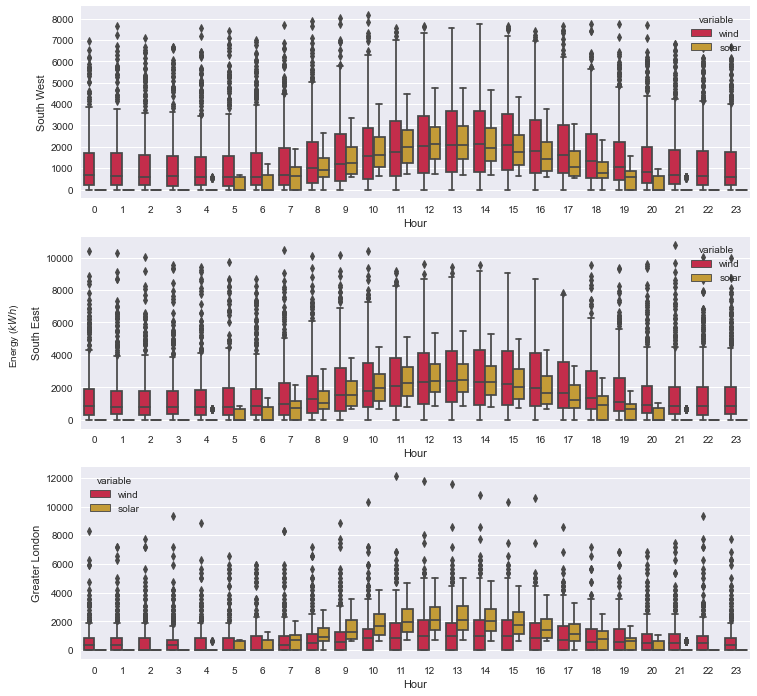

In [19]:
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,figsize=(12,12))

for j in [0,1,2]:
    ys_wind_solar = df_proc
    ys_wind_solar[['wind','solar']] = df_proc[[wind_column_energy[j],solar_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=['wind','solar'], ignore_index=False, var_name="variable", value_name=label[j])
    sns.boxplot(ax=ax[j], x=ys_w_s.index.hour, y=label[j], hue="variable", palette=[wind_color, solar_color],data=ys_w_s)
    ax[j].set_xlabel('Hour')
    
fig.text(0.04, 0.5, energy_label, va='center', rotation='vertical')


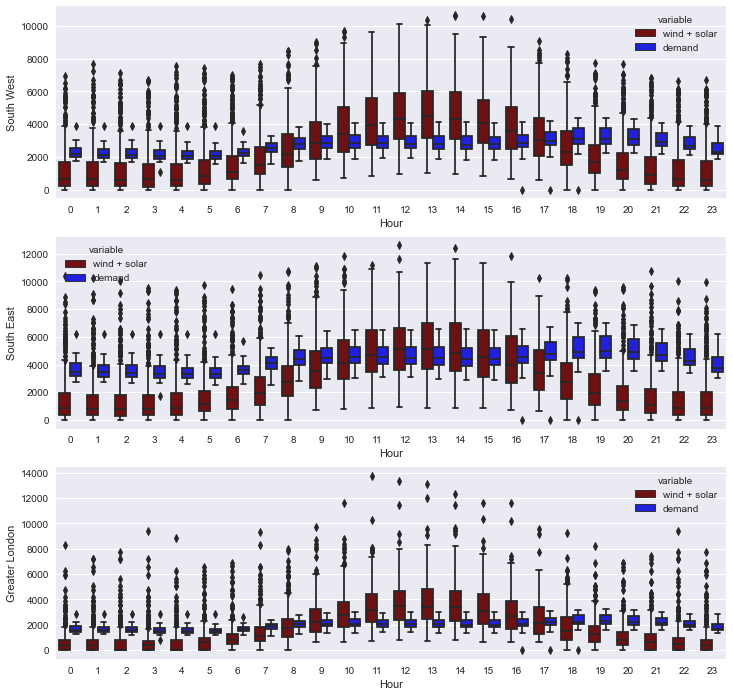

In [20]:
fig,ax =  plt.subplots(3,figsize=(12,12))

for j in [0,1,2]:
    ys_wind_solar = df_proc
    ys_wind_solar[['wind + solar','demand']] = df_proc[[wind_solar_column_energy[j],demand_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=['wind + solar','demand'], ignore_index=False, value_name=label[j])
    sns.boxplot(ax=ax[j], x=ys_w_s.index.hour, y=label[j], hue="variable", palette=[wind_solar_color, demand_color],data=ys_w_s)
    ax[j].set_xlabel('Hour')


TypeError: boxplot() got an unexpected keyword argument 'ylabel'

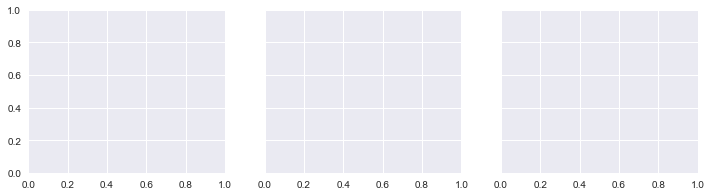

In [21]:

fig,ax =  plt.subplots(1,3,figsize=(12,3),sharey=True)

for j in [0,1,2]:
    ys_wind_solar = df_proc
    ys_wind_solar[['wind','solar']] = df_proc[[wind_solar_column_energy[j],demand_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=['wind','solar'], ignore_index=False, value_name=label[j])
    sns.boxplot(ax=ax[j], x=ys_w_s.index.dayofweek,  ylabel="", hue="variable", palette=[wind_solar_color, demand_color],data=ys_w_s)
    ax[j].set_xlabel('Day of the week')
